## Import libraries

In [12]:
import requests
%matplotlib inline
import matplotlib.pyplot as plt
import json 
from PIL import Image
from io import BytesIO
from pprint import pprint

## Get the subscription key and endpoint URL

In [13]:
#save subscription key and end_point as variables
my_cv_sub_key = "<YOUR SUBSCIPTION KEY>"
my_cv_end_point = "<YOUR SUBSCIPTION ENDPONT>"

## Build complete URI request

In [14]:
my_analyze_url = my_cv_end_point + "vision/v2.1/analyze"
my_analyze_url

'https://diem-computer-vision-api.cognitiveservices.azure.com/vision/v2.1/analyze'

# Example 1

In [15]:
#my_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/9/97/Pont_des_Arts%2C_Paris.jpg/2560px-Pont_des_Arts%2C_Paris.jpg"
#my_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/e6/Paris_Night.jpg/2560px-Paris_Night.jpg"
#my_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Paris_vue_d%27ensemble_tour_Eiffel.jpg/1920px-Paris_vue_d%27ensemble_tour_Eiffel.jpg"

## Chose an Image

In [16]:
my_image_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Paris_vue_d%27ensemble_tour_Eiffel.jpg/1920px-Paris_vue_d%27ensemble_tour_Eiffel.jpg"

## Setup the request object with subscription key and uri request

In [17]:
#configure the requests object - this is how we send the request to the api
headers = {'Ocp-Apim-Subscription-Key': my_cv_sub_key}
print(headers)
params = {'visualFeatures':'Categories,Description,Objects'}
print(params)
data = {'url': my_image_url}
print(data)


{'Ocp-Apim-Subscription-Key': 'cd1751e2a6134ec2b8cbe749d8f17fff'}
{'visualFeatures': 'Categories,Description,Objects'}
{'url': 'https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Paris_vue_d%27ensemble_tour_Eiffel.jpg/1920px-Paris_vue_d%27ensemble_tour_Eiffel.jpg'}


## Get the response

In [18]:
import requests

response = requests.post(my_analyze_url, headers=headers,params=params,json=data)
print(type(response))
response

<class 'requests.models.Response'>


<Response [200]>

## Analyse Json object in response

In [7]:
#store the results in the analysis object
analysis=response.json()
print(type(analysis))
print(analysis)
print(analysis['categories'])

<class 'dict'>
{'categories': [{'name': 'building_', 'score': 0.36328125, 'detail': {'landmarks': []}}, {'name': 'outdoor_', 'score': 0.015625, 'detail': {'landmarks': []}}, {'name': 'outdoor_city', 'score': 0.26171875, 'detail': {'landmarks': []}}], 'description': {'tags': ['outdoor', 'building', 'city', 'large', 'water', 'grass', 'sheep', 'grazing', 'many', 'field', 'herd', 'view', 'hill', 'body', 'ocean', 'flock', 'standing', 'white', 'river', 'group'], 'captions': [{'text': 'a large body of water with a city in the background', 'confidence': 0.9041116079947047}]}, 'objects': [], 'requestId': '4a53df21-0574-4f7d-8629-eb30cdc937a4', 'metadata': {'width': 1920, 'height': 1280, 'format': 'Jpeg'}}


In [19]:
print(analysis['categories'])

[{'name': 'food_grilled', 'score': 0.7890625}]


## Display the image with the caption

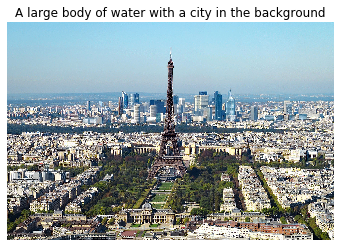

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO

image = Image.open(BytesIO(requests.get(my_image_url).content))
plt.imshow(image)
plt.axis("off")
_ = plt.title(analysis["description"]["captions"][0]["text"].capitalize(), size="large")
plt.show()


# Example 2

In [21]:
#my_image_url = 'https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/1_st_michaels_mount_2017.jpg/1200px-1_st_michaels_mount_2017.jpg'

#my_image_url = 'https://i.ytimg.com/vi/ATIL6e8APXQ/hqdefault.jpg'

my_image_url = 'https://upload.wikimedia.org/wikipedia/commons/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg'

#configure the requests object - this is how we send the request to the api
headers = {'Ocp-Apim-Subscription-Key': my_cv_sub_key}
print(headers)
params = {'visualFeatures':'Categories,Description,Objects'}
print(params)
data = {'url': my_image_url}
print(data)
response = requests.post(my_analyze_url, headers=headers,params=params,json=data)
print(type(response))
pprint(response)

{'Ocp-Apim-Subscription-Key': 'cd1751e2a6134ec2b8cbe749d8f17fff'}
{'visualFeatures': 'Categories,Description,Objects'}
{'url': 'https://upload.wikimedia.org/wikipedia/commons/e/e7/Everest_North_Face_toward_Base_Camp_Tibet_Luca_Galuzzi_2006.jpg'}
<class 'requests.models.Response'>
<Response [200]>


In [22]:
#store the results in the analysis object
analysis=response.json()
print(type(analysis))
pprint(analysis)

<class 'dict'>
{'categories': [{'detail': {'landmarks': []},
                 'name': 'outdoor_mountain',
                 'score': 0.99609375}],
 'description': {'captions': [{'confidence': 0.9326351927993547,
                               'text': 'a view of a snow covered mountain'}],
                 'tags': ['mountain',
                          'snow',
                          'outdoor',
                          'nature',
                          'covered',
                          'man',
                          'standing',
                          'background',
                          'skiing',
                          'side',
                          'hill',
                          'camera',
                          'view',
                          'field',
                          'slope',
                          'overlooking',
                          'area',
                          'wearing',
                          'red',
                          'pe

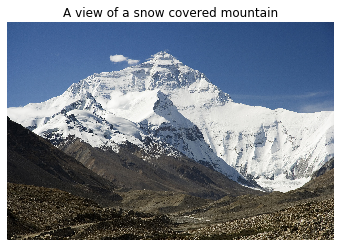

In [23]:
#Display the image with the caption
image = Image.open(BytesIO(requests.get(my_image_url).content))

plt.imshow(image)

plt.axis("off")

_ = plt.title(analysis["description"]["captions"][0]["text"].capitalize(), size="large")

plt.show()
